# Analysis of Classical Fischer Information of noisy circuits

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pathlib
import numpy as np
from matplotlib import cm
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 2.5


from queso.utils.io import IO

In [126]:
ns = [2, 3, 4, 5, 6, 7]
ks = [2, 3, 4, 5, 6]

In [127]:
def load_data(io, ns, ks):
    data = {}
    for n in ns:
        _d = {}
        for k in ks:
            fid = io.path.joinpath(f'n={n}_k={k}.pkl')
            if fid.is_file():
                _df = io.load_dataframe(fid.stem)

                # fix datatype issues
                _df["cfi"] = _df["cfi"].astype('float64')

            else:
                _df = None

            _d[k] = _df
        data[n] = _d


    return data

io = IO(folder=r"noisy_cfi_batch_sweep", verbose=False)
data = load_data(io, ns, ks)

In [128]:
for n in ns:
    for k in ks:
        df = data[n][k]
        # print(f"n={n}, k={k} | {df.cfi.max() if df is not None else 'NA'}")

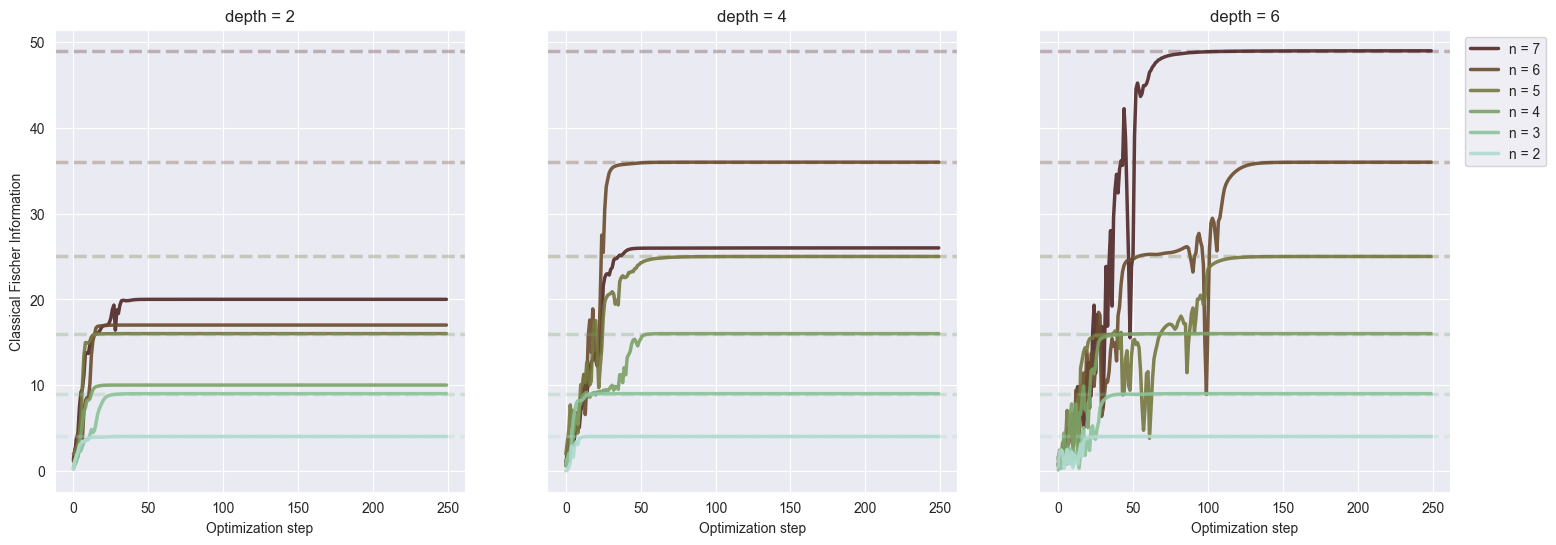

In [129]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=[18, 6], sharey=True)
colors = sns.cubehelix_palette(start=0.5, rot=0.75, dark=0.2, light=.8, as_cmap=True)
norm = lambda x: (x - np.min(ns))/(np.max(ns) - np.min(ns))

gammas = sorted(df["gamma"].unique())
gamma = gammas[0]

ks = (2, 4, 6)
for ax, k in zip(axs, ks):
    for n in reversed(ns):
        ax.axhline(n**2, color=colors(norm(n)), ls='--', alpha=0.3)

        df = data[n][k]
        row = df[df["gamma"] == gamma]

        row = row.loc[row["cfi"].idxmax()]

        ax.plot(row.loss, color=colors(norm(n)), alpha=0.9, label=f"n = {n}")

    ax.set(xlabel="Optimization step", title=f"depth = {k}")
    if ax == axs[0]:
        ax.set(ylabel="Classical Fischer Information")
    if ax == axs[-1]:
        ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1), ncol=1)

plt.show()

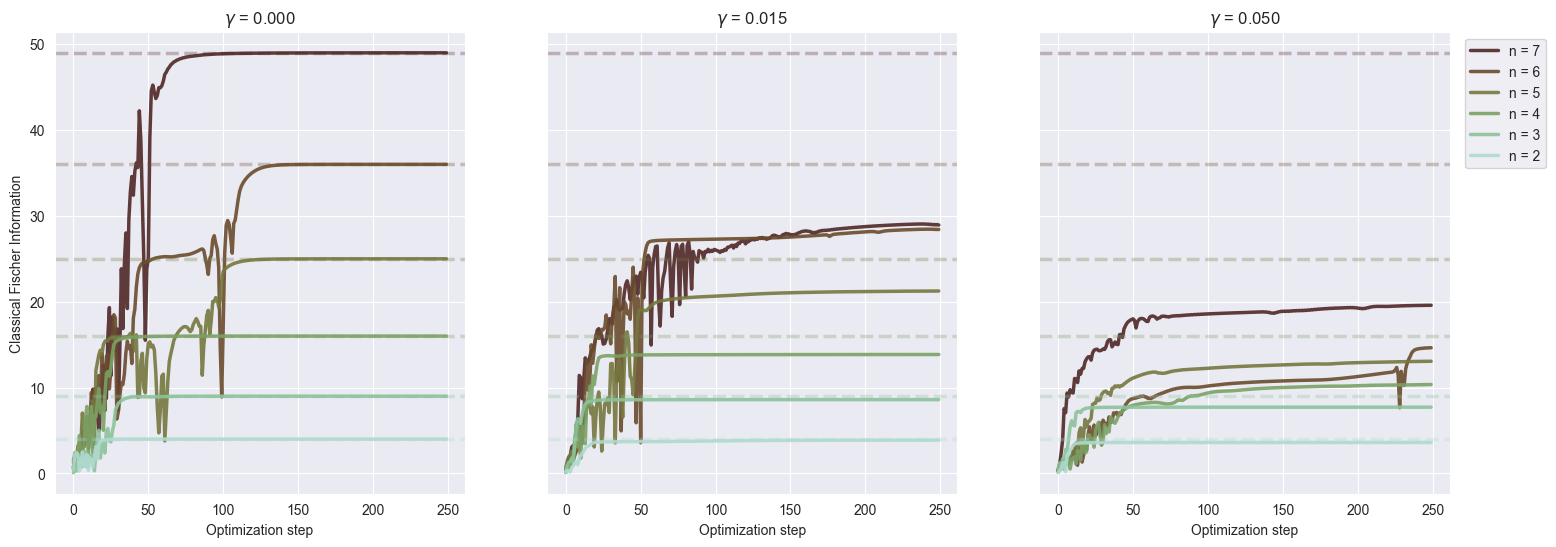

In [130]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=[18, 6], sharey=True)
colors = sns.cubehelix_palette(start=0.5, rot=0.75, dark=0.2, light=.8, as_cmap=True)
norm = lambda x: (x - np.min(ns))/(np.max(ns) - np.min(ns))

gammas = sorted(df["gamma"].unique())
k = 6
for ax, i in zip(axs, (0, 3, 6)):
    gamma = gammas[i]
    for n in reversed(ns):
        ax.axhline(n**2, color=colors(norm(n)), ls='--', alpha=0.3)

        df = data[n][k]
        row = df[df["gamma"] == gamma]

        row = row.loc[row["cfi"].idxmax()]

        ax.plot(row.loss, color=colors(norm(n)), alpha=0.9, label=f"n = {n}")

    ax.set(xlabel="Optimization step", title=f"$\gamma$ = {gamma:0.3f}")
    if ax == axs[0]:
        ax.set(ylabel="Classical Fischer Information")
    if ax == axs[-1]:
        ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1), ncol=1)

plt.show()

### How does a fixed circuit change when noise is added after each layer?

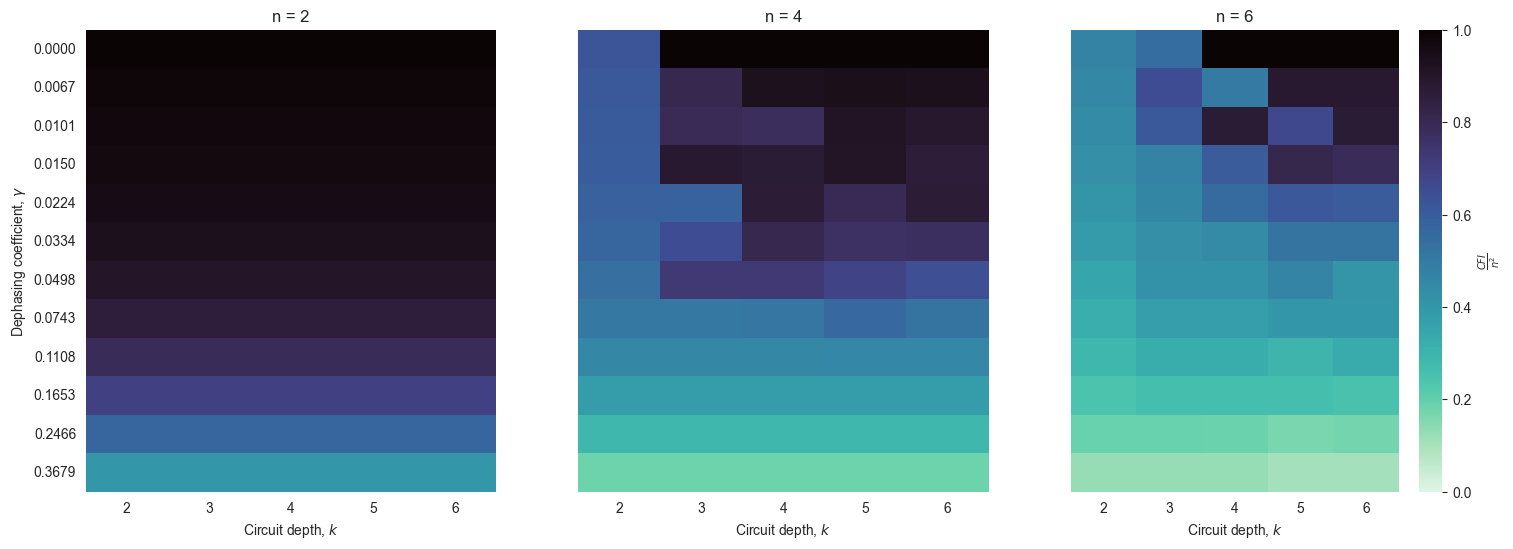

In [131]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=[18, 6], sharey=True)

gammas = sorted(df["gamma"].unique())
ks = [2, 3, 4, 5, 6]
n = 7
for ax, n in zip(axs, (2, 4, 6)):
    mat = np.zeros([len(ks), len(gammas)])
    for i, k in enumerate(reversed(ks)):
        for j, gamma in enumerate(gammas):

            df = data[n][k]
            row = df[df["gamma"] == gamma]
            row = row.loc[row["cfi"].idxmax()]

            mat[i, j] = row["cfi"]

    mat = np.flipud(mat)

    yticks = [f"{gamma:0.4f}" for gamma in gammas]
    sns.heatmap(mat.T / n**2, xticklabels=ks, yticklabels=yticks, ax=ax, vmax=1.0, vmin=0.0,
                cmap="mako_r", cbar_kws={"label": r"$\frac{CFI}{n^2}$"}, cbar=True if ax==axs[-1] else False)
    ax.set(xlabel="Circuit depth, $k$", title=f"n = {n}")
    if ax == axs[0]:
        ax.set(ylabel="Dephasing coefficient, $\gamma$", )
        ax.set_yticks(ticks=list(range(len(yticks))), rotation=45)
        # plt.yticks(rotation=0)
plt.show()